# Creating Meaningful Wordclouds in Python
## Using WordCloud with different methods to create custom Images

This notebook was created in tandem with this [medium article](https://bdickinson.medium.com/) by [Bryan Dickinson](https://bdickinson.medium.com/). The goal is to become familiar with creating word clouds using WordCloud and create this image.

<img src="wordclouds/biden_wordcloud.png"></img>

### Import Libraries & Clean Data

Uncomment and run the below cell to install wordcloud. You can check out the documentation of other ways to install [here](https://pypi.org/project/wordcloud/).

In [ ]:
# !pip install wordcloud

In [ ]:
#import necessary libraries

#for importing data and wrangling
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#additional stop words
from spacy.lang.en.stop_words import STOP_WORDS

from collections import Counter


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read in the data
df = pd.read_csv('/content/drive/MyDrive/debate_transcripts.csv', encoding="cp1252")

In [ ]:
df.head()

,date,debate_name,debate_section,speaker,speech,speaking_time_seconds
0,02-25-2020,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Norah O’Donnell,"Good evening and welcome, the Democratic presi...",8.0
1,02-25-2020,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Gayle King,And Super Tuesday is just a week away and this...,22.0
2,02-25-2020,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Norah O’Donnell,And CBS News is proud to bring you this debate...,14.0
3,02-25-2020,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Gayle King,And we are partnering tonight also with Twitte...,10.0
4,02-25-2020,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Norah O’Donnell,"Now, here are the rules for the next two hours...",31.0


In [ ]:
# list of candidate speakers
speakers = ['Bernie Sanders','Michael Bloomberg', 'Pete Buttigieg', 'Elizabeth Warren','Tom Steyer',
            'Joe Biden', 'Amy Klobuchar', 'Andrew Yang', 'Kamala Harris', 'Cory Booker', 'Tulsi Gabbard',
            'Julian Castro','Beto O’Rourke','Sec. Castro','Bill de Blasio', 'Michael Bennet', 'Jay Inslee',
            'Kirsten Gillibrand','Kirseten Gillibrand','Steve Bullock', 'Marianne Williamson','John Delaney',
            'Tim Ryan', 'John H.', 'John Hickenloop', 'J. Hickenlooper', 'Bennett', 'Eric Stalwell',
            'Eric Swalwell']

#### Function to clean speaker names

In [ ]:


def change_speaker_text(row):
    ''' Function to clean the candidate names and make them representation standard'''

    speaker = row['speaker']

    if 'biden' in speaker.lower():
        speaker = 'biden'
    elif 'buttigieg' in speaker.lower():
        speaker = 'buttigieg'
    elif 'klobuchar' in speaker.lower():
        speaker = 'klobuchar'
    elif 'sanders' in speaker.lower():
        speaker = 'sanders'
    elif 'steyer' in speaker.lower():
        speaker = 'steyer'
    elif 'warren' in speaker.lower() or 'elizabeth' in speaker.lower():
        speaker = 'warren'
    elif 'yang' in speaker.lower():
        speaker = 'yang'
    elif 'bennet' in speaker.lower() or 'bennett' in speaker.lower():
        speaker = 'bennet'
    elif 'booker' in speaker.lower():
        speaker = 'booker'
    elif 'bloomberg' in speaker.lower():
        speaker = 'bloomberg'
    elif 'castro' in speaker.lower():
        speaker = 'castro'
    elif 'delaney' in speaker.lower():
        speaker = 'delaney'
    elif 'gabbard' in speaker.lower():
        speaker = 'gabbard'
    elif 'williamson' in speaker.lower() or 'marianne' in speaker.lower():
        speaker = 'williamson'
    elif "o'rourke" in speaker.lower() or 'beto' in speaker.lower():
        speaker = "o'rourke"
    elif 'blasio' in speaker.lower():
        speaker = 'de blasio'
    elif 'bullock' in speaker.lower():
        speaker = 'bullock'
    elif 'gillibrand' in speaker.lower():
        speaker = 'gillibrand'
    elif 'harris' in speaker.lower():
        speaker = 'harris'
    elif 'hickenloop' in speaker.lower() or 'john h' in speaker.lower() or 'hickenlooper' in speaker.lower():
        speaker = 'hickenlooper'
    elif 'inslee' in speaker.lower():
        speaker = 'inslee'
    elif 'swalwell' in speaker.lower() or 'stalwell' in speaker.lower():
        speaker = 'swalwell'
    elif 'ryan' in speaker.lower():
        speaker = 'ryan'

    else:
        speaker = speaker[:-1]

    return speaker

#### Clean and filter the dataframe

In [ ]:
# filter the dataframe to only those in the speakers list
df=df[df.speaker.isin(speakers)]
#filter to only the speaker and speech columns
df=df[['speaker','speech']]
# fix speaker names
df['speaker'] = df.apply(change_speaker_text, axis=1)

In [ ]:
#verify all the names are fixed
df.speaker.unique()

array(['sanders', 'bloomberg', 'buttigieg', 'warren', 'steyer', 'biden',
       'klobuchar', 'yang', 'harris', 'booker', 'gabbard', 'castro',
       "o'rourke", 'de blasio', 'bennet', 'inslee', 'gillibrand',
       'bullock', 'williamson', 'delaney', 'ryan', 'hickenlooper',
       'swalwell'], dtype=object)

In [ ]:
df.head(n=100)

,speaker,speech
5,sanders,"Well, you’re right, the economy is doing reall..."
6,bloomberg,Senator-
8,bloomberg,I think that Donald Trump thinks it would be b...
9,sanders,"Oh, Mr. Bloomberg. Let me tell Mr. Putin. Okay..."
11,buttigieg,We know what the President … what Russia wants...
...,...,...
141,buttigieg,We can do the math right now.
142,sanders,You asked me a question.
144,klobuchar,"No, the math does not add up. In fact, just on..."
145,klobuchar,"The nickels and the dimes. Well, let me tell y..."


In [ ]:
# update stopwords
stop_words = ['people','president','senator','thank','going','would','want',
              'right','one','think','american','america','sure',' ','country',
              'govenor','need','congressman','crosstalk','judy','oh','mention',
              'vain','name','sorry','mention','respond','come','say','respond','thing',
             'know','talk','get','look','fact','saying','inaudible','book','glad','decade',
             'fight','mean','way','like','time','states','year','let', 'll','ve','joe','number','740','argued','re','said','able','now','make','will','job','S','deal','got','000','2007','don','t','done','m','united','2007','u','00','two','things','well','vice','years','go','matter','billion','make','making','plan','mad']

STOP_WORDS.update(stop_words) #spacy stop words
STOPWORDS.update(stop_words) #WordCloud stop words
stop_words_list = list(STOP_WORDS)



## Method 1 | UseWordCloud to process the text

The simplest and fastest way to create a word cloud is to simply use wordcloud to process the text.

In [ ]:
# WordCloud needs one string of text to generate the wordcloud image,
# so we will filter and combine the text of one candidate

#filter the df to one candidate, and create a list of responses from them
text = df[df.speaker=='biden'].speech.tolist()
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,background_color='white',
                      collocations=True).generate(text)

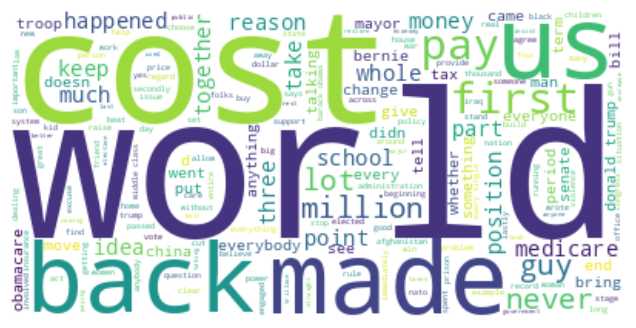

In [ ]:
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

Now, that doesn't look too informative.  An option could be to continue updating stop words. A challenge with that process knowing when to stop. When do you know you have a 'good' amount of words without removing useful words?

Lets take a look at the word frequencies <br>
We can organize the dictionary using the *process_text()* method which returns the actual count of words, or use the wordcloud *words_* method that returns the relative frequency of all the words.

In [ ]:
word_freq={k: v for k, v in sorted(wordcloud.process_text(text).items(),reverse=True, key=lambda item: item[1])}

rel_freq=wordcloud.words_

In [ ]:

print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('world', 46), ('cost', 46), ('made', 38), ('us', 38), ('back', 37)]
[('world', 1.0), ('cost', 1.0), ('made', 0.8260869565217391), ('us', 0.8260869565217391), ('back', 0.8043478260869565)]


Let's check out another candidate. Check a couple more to see what some of the top words are.

In [ ]:
# WordCloud needs one string of text to generate the wordcloud image,
# so we will filter and combine the text of one candidate

#filter the df to one candidate, and create a list of responses from them
text = df[df.speaker=='buttigieg'].speech.tolist()
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)
list({k: v for k, v in sorted(wordcloud.process_text(text).items(),reverse=True, key=lambda item: item[1])}.items())[:5]

[('us', 77), ('part', 56), ('actually', 55), ('even', 53), ('washington', 45)]

Looking at another candidates we that other potentitially insignificant words appear in the top 15 or so words. <br>
Let's tweak some additional parameters of WordCloud to improve the words shown.

***Note:*** The stopwords were changed to the spacy set. (*STOP_WORDS*)

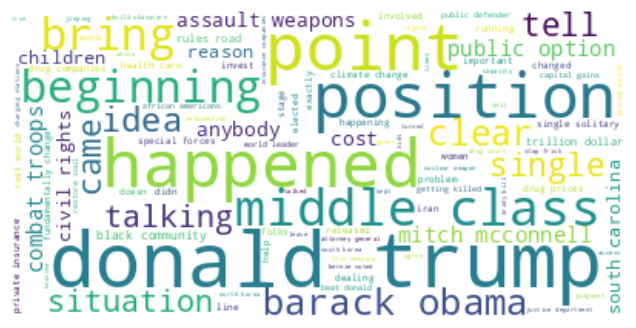

In [ ]:
# WordCloud needs one string of text to generate the wordcloud image,
# so we will filter and combine the text of one candidate

#filter the df to one candidate, and create a list of responses from them
text = df[df.speaker=='biden'].speech.tolist()
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOP_WORDS, background_color='white',
                      collocations=True,
                      min_word_length =4,
                      collocation_threshold=3).generate(text)

text1_dict={k: v for k, v in sorted(wordcloud.process_text(text).items(),reverse=True, key=lambda item: item[1])}

plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

This is a bit better. We also see bigrams words like Barack Obama, Donald Trump, and middle class rise in relative frequency. You could also check the top words with this process for a few other candidates. Do you think they will be drastically different?

## Method 2 | Utilizing Word Frequencies

What if you don't necessarily have access to the full text or want to use word frequencies? WordCloud has an alternative to the *generate()* method, *generate_from_frequencies()* method that will take a dictionary of words and their frequencies and create the wordcloud

We will create a bag of words using CountVectorizer, and utilize this dataframe to create the wordcloud.

In [ ]:
# create a list of candidates
speakers = df.speaker.unique()
#create a list of responses for each candidate using a list comprehension
corpus = [' '.join(df[(df.speaker==candidate)].speech.tolist()) for candidate in speakers]

In [ ]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#instantiate a CountVectorizer object
cv=CountVectorizer( stop_words=stop_words_list, ngram_range=(1, 3))

We created a count vectorizer object, using our stop words and creating ngrams from 1 to 3.

In [ ]:


# Fit the CountVectorizer to your text data
X = cv.fit_transform(corpus)

# Create a DataFrame from the transformed data
bow = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
bow.index = speakers


In [ ]:
bow.shape

(23, 137955)

In [ ]:
bow.head()

,001st,001st dollar,001st dollar dollar,01,01 01,01 01 01,01 01 09,01 01 ask,01 02,01 02 06,...,zone expect fly,zone experience,zone experience knowing,zone fly,zone fly zone,zone leader,zone leader north,zuckerberg,zuckerberg testified,zuckerberg testified congress
sanders,0,0,0,7,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
bloomberg,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
buttigieg,0,0,0,7,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
warren,1,1,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
steyer,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


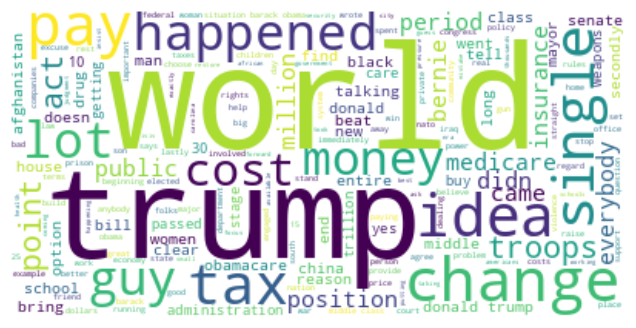

In [ ]:
# create a pandas Series of the top 4000 most frequent words
text=bow.loc['biden'].sort_values(ascending=False)[:4000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['biden'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We see that this wordcloud is pretty similar to the previous. When we use the generate_from_frequencies method it ignores the collocations and min_word_length parameters. It also looks like it lematizes a lot of the words, creating 'Don' vs Donald. We will combine dictionaries later, but we will leave this one out because it is very similar to the first word cloud.

**Collections**

You can also utilize the Counter object to create a dictionary that you can utilize with wordcloud. This would require preprocessing your text including tokenizing the words, then using the counter object to count each word. Given that you need the whole text it would be easier to utilize the full text with the WordCloud object to perform this for you.

## Method 3 | Log Odds Ratio

From the latest word cloud we get a pretty good group of words that encompass what these candidates have said. You can probably assume that candidates will have similar words, like *'washington'*, *'trump'*, *'plan'*, *'united'*. Go back up and check out different candidates' top words. But what about words or phrases that are specific to a certain person? For example, if you've watched these debates you may have noticed that Amy Klobuchar mentions *'lead democrat'* and Biden likes to count off his points (*'number one'*, *'number two'* ...) quite often. We could get a view of important words or phrases that are metnioned by a particular candidate, but not others.

This is a great method to segment your data and discover differences in text, for say reviews of your restaurant.


Put simply we want to see which words are most common from a specific candidate, say Pete Buttigieg, relative to all other candidates. And we'll do this with each candidate.



To do this we'll use the measure of [log odds ratio](https://en.wikipedia.org/wiki/Odds_ratio) calculated for each word as:

$\log_{2} \left( \cfrac{\cfrac{\text{# from Candidate}+1}{\text{Total from Candidate}+1}}{\cfrac{\text{# from Other Candidates}+1}{\text{Total from Other Candidates}+1}} \right) $

[Additive smoothing](https://en.wikipedia.org/wiki/Additive_smoothing) used to avoid dividing by zero.


In [ ]:
from tqdm import tqdm #tqdm used for progress bar
import math

#build an empty dataframe
t_bow_df=pd.DataFrame()

#By candidate, divide the number of times a word is said, by the total number of times they've said all the words they've said (frequency)
bow_transformed = bow.apply(lambda x: (x+1)/ (bow.loc[x.name].sum()+1), axis=1)

for candidate in tqdm(speakers):
    feat_s = bow[bow.index != candidate].sum()+1 #sum all the times each word was said excluding the candidate
    feat_s_all = np.sum(bow[bow.index != candidate].sum()) # all the total words that were said, excluding the candidate
    tot = feat_s / feat_s_all #find the frequency of words said among other candidates
    row = bow_transformed.loc[candidate] / tot #divide the candidate's array of frequency of words by all other candidates' frequency
    row = pd.DataFrame(row).T #create a df, and transform
    results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency

    t_bow_df = pd.concat([t_bow_df, pd.DataFrame([results], index=[candidate])]) #append to df


100%|██████████| 23/23 [02:06<00:00,  5.52s/it]


The result is the countvectorizer bag of words dataframe where each word is the frequency of being said by each candidate to the log odds of that word

In [ ]:
t_bow_df.head()

,001st,001st dollar,001st dollar dollar,01,01 01,01 01 01,01 01 09,01 01 ask,01 02,01 02 06,...,zone expect fly,zone experience,zone experience knowing,zone fly,zone fly zone,zone leader,zone leader north,zuckerberg,zuckerberg testified,zuckerberg testified congress
sanders,1.990605,1.990605,1.990605,0.781151,2.405642,1.990605,3.990605,1.990605,3.990605,3.990605,...,1.990605,1.990605,1.990605,1.990605,1.990605,1.990605,1.990605,1.990605,1.990605,1.990605
bloomberg,4.637550,4.637550,4.637550,1.211286,3.637550,4.637550,4.637550,4.637550,4.637550,4.637550,...,4.637550,4.637550,4.637550,4.637550,4.637550,4.637550,4.637550,4.637550,4.637550,4.637550
buttigieg,1.943803,1.943803,1.943803,0.734350,0.943803,1.943803,1.943803,1.943803,1.943803,1.943803,...,1.943803,3.943803,3.943803,1.943803,1.943803,1.943803,1.943803,1.943803,1.943803,1.943803
warren,3.896092,3.896092,3.896092,-0.103908,0.896092,1.896092,1.896092,1.896092,1.896092,1.896092,...,1.896092,1.896092,1.896092,1.896092,1.896092,1.896092,1.896092,1.896092,1.896092,1.896092
steyer,3.341529,3.341529,3.341529,0.983977,2.341529,3.341529,3.341529,3.341529,3.341529,3.341529,...,3.341529,3.341529,3.341529,3.341529,3.341529,3.341529,3.341529,3.341529,3.341529,3.341529


In [ ]:
t_bow_df.loc['biden'].sort_values(ascending=False)[:10]

women act             6.399990
violence women act    6.399990
violence women        6.399990
inspectors            5.940559
legitimacy            5.747914
single solitary       5.747914
lastly                5.747914
special forces        5.747914
restore soul          5.747914
postpone              5.525521
Name: biden, dtype: float64

We can see that the top words are very different than the prior word clouds and very unique to that candidate. This method also utilizes ngrams from the countvectorizer object.


In [ ]:
text=t_bow_df.loc['biden'].sort_values(ascending=False)[:4000]
text3_dict={k: v for k, v in sorted(text.items(),reverse=True, key=lambda item: item[1])}

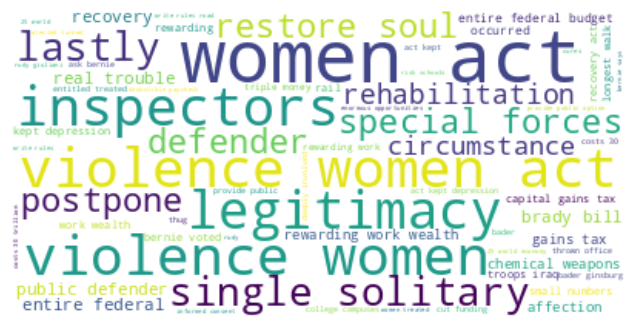

In [ ]:
wordcloud = WordCloud(min_word_length =3,
                      background_color='white').generate_from_frequencies(text3_dict)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Combine the words

We now have a couple different dicitonaries that we can utilize separatley or combine to create an all encompassing wordcloud. We will combine two of the dictionaries. You'll notice that a word may be spelled differently. Like healthcare and health care. We will add these together to give a better representation of the word.

I adjusted the frequencies these dictionaries, which is very arbitrary. You can check that out on the notebook on the github repo.

In [ ]:
# find the most common word frequency from the first dictionary
# and divide by the most common word frequency in the second dictionary
multiplier=((Counter(text1_dict).most_common(1)[0][1]))/Counter(text3_dict).most_common(1)[0][1]

# multiply the value in dictionary 2, by the mutiplier above to make
# the top value equal to the first dictionary. Use subsequently smaller values of the multiplier
text3_dict={k[0]:int(k[1]*v) for k, v in zip(text3_dict.items(),np.linspace(multiplier, 1, 4000) )}

In [ ]:

#combine the two dictionaries
full_dict = Counter(text3_dict)+Counter(text1_dict)
# add word frequency values from 'health care' and 'healthcare' into one key
full_dict['health care'] = full_dict.get('health care', 0) + full_dict.get('healthcare', 0)

In [ ]:
#sort the dictionary
full_dict={k: v for k, v in sorted(full_dict.items(),reverse=True, key=lambda item: item[1])}

In [ ]:
# list the top 5
list(full_dict.items())[:5]

[('single solitary', 27),
 ('special forces', 27),
 ('restore soul', 26),
 ('public defender', 25),
 ('women act', 24)]

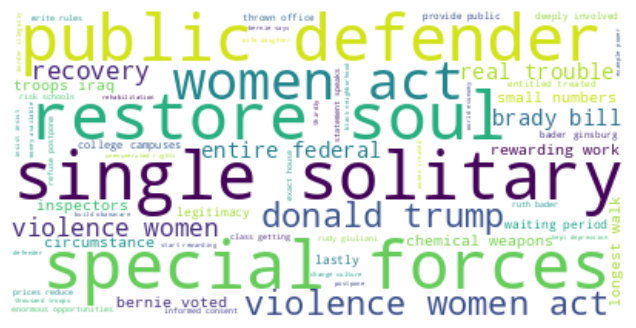

In [ ]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(full_dict)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

Great, we see a blending of both words that were very frequent of the candidate and words that are common to that candidate alone. Now, how do we create a custom wordcloud?

### Create the word cloud image

### Find or create the right image

First you need a high contrast black/white photo. I used the below photo, and used photoshop to create the transformation to black & white. You can also use online photo editors such as https://pixlr.com/ to make the transformation.

Pro tip: you dont want a transparent background, but a white background. If you use a transparent background it will read in transparent pixel values as black. I noticed when I used illustrator and photoshop, the resulting png image resulted in different values, including black, for the black area. I will 'touch up' the photo using numpy to lighten the image.

The resulting image after the transformation is below.

#### Original Image

<img src='photos/biden_full.jpg'></img>


<sup>photo by <a href="https://www.flickr.com/people/gageskidmore/">Gage Skidmore</a> CC BY-SA 2.0</sup>

#### Transformed Image

<img src='photos/biden.png'></img>


### Creating a wordcloud with a colormap

***NOTE:*** You will need to add the font or remove the *'font_path'* parameter and use the general font. Point the font path to a font on your local computer. There are many websites to downoad paid and free fonts. The font I used can be downloaded for free for personal use [here](https://freefontsfamily.com/gotham-font-family/).

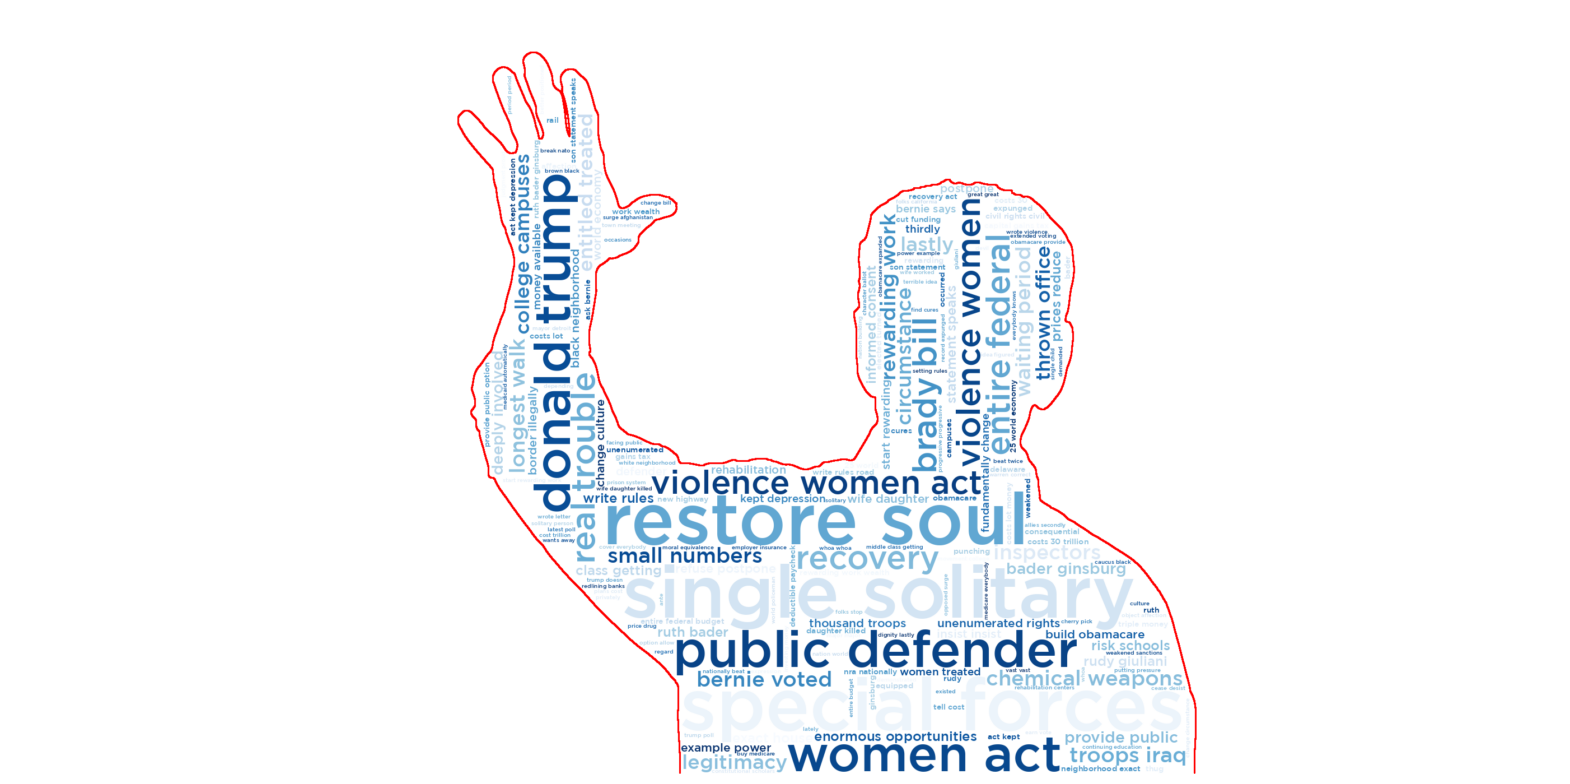

In [ ]:
### colormap

# open the image and use np.array to transform the file to an array

cand_mask=np.array(Image.open('/content/drive/MyDrive/biden.png'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
wordcloud = WordCloud(font_path = '/content/drive/MyDrive/GothamMedium.ttf',
                      background_color='white',
                      contour_color='red',
                      mask=cand_mask, colormap='Blues',
                      contour_width=4).generate_from_frequencies(full_dict)


#plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This is really cose to the image above. I used the 'Blues' color map, and the colors get pretty light near the end of the spectrum. I will import the colormap as a matrix of colors and select the darker part of the matrix.

In [ ]:
# save the file
wordcloud.to_file("/content/drive/MyDrive/biden_wordcloud-lt.png")

#### Importing and tweaking the colormap

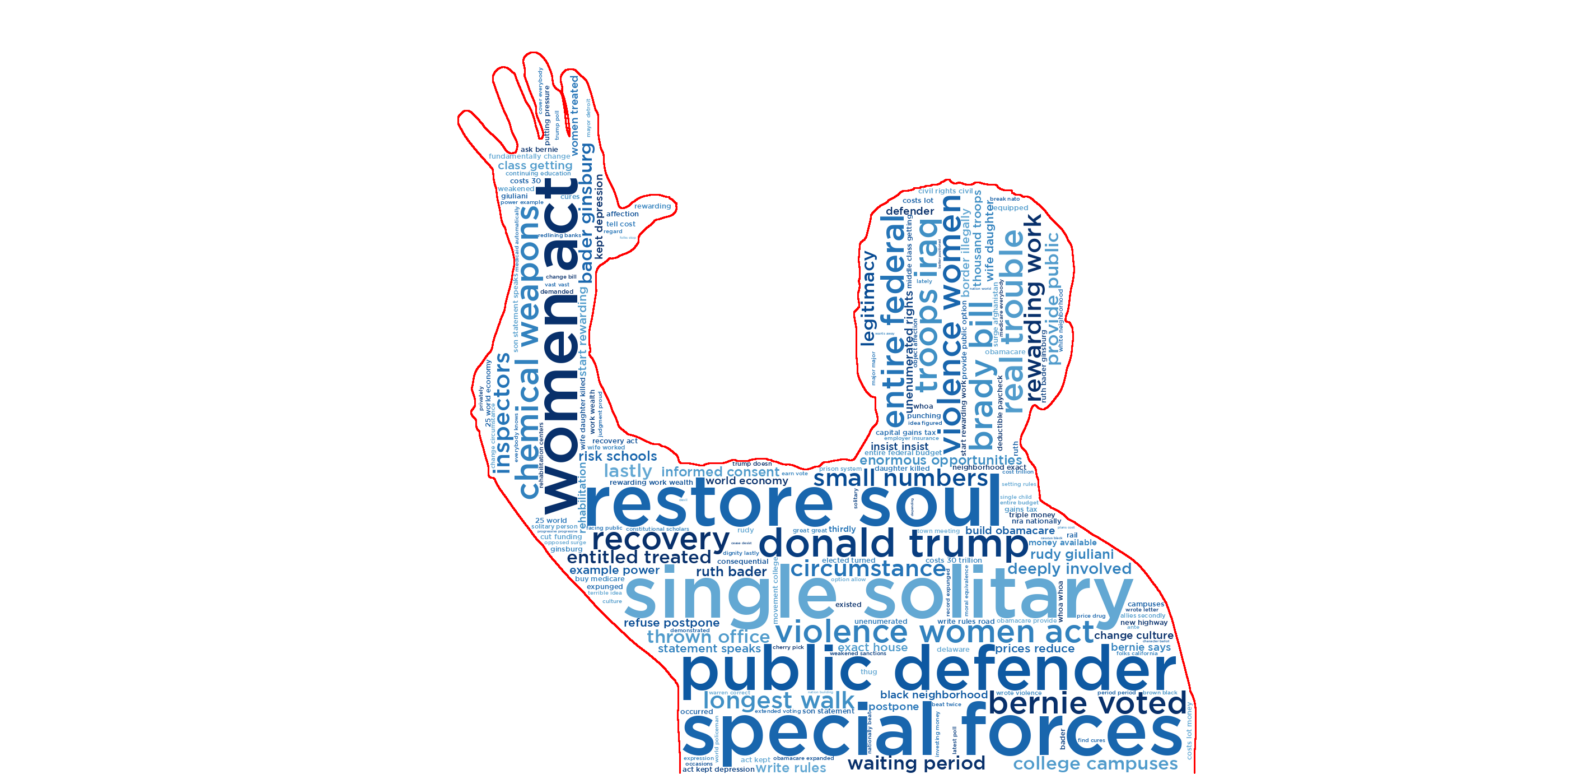

In [ ]:
# import colormap from matplotlib as a matrix of colors
cmap = mpl.cm.Blues(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[-10:,:-1]) # select only a subset of the matrix

#create and generate our wordcloud object
wordcloud = WordCloud(font_path = '/content/drive/MyDrive/GothamMedium.ttf',
                      background_color='white',
                      contour_color='red',
                      mask=cand_mask, colormap=cmap,
                      contour_width=4).generate_from_frequencies(full_dict)


#plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We created the image!

You can see that the completed product looks pretty good. You can take this png image and utilize it as a visualization in part of a project. You can continue to tweak the parameters such as the number words to use, font size, and font type

Continue on to create a few different word clouds

You can save the image using the to_file method and passing a location to save the file.

In [ ]:
# save the file
wordcloud.to_file("biden_wordcloud.png")

### Creating a wordcloud with a custom color

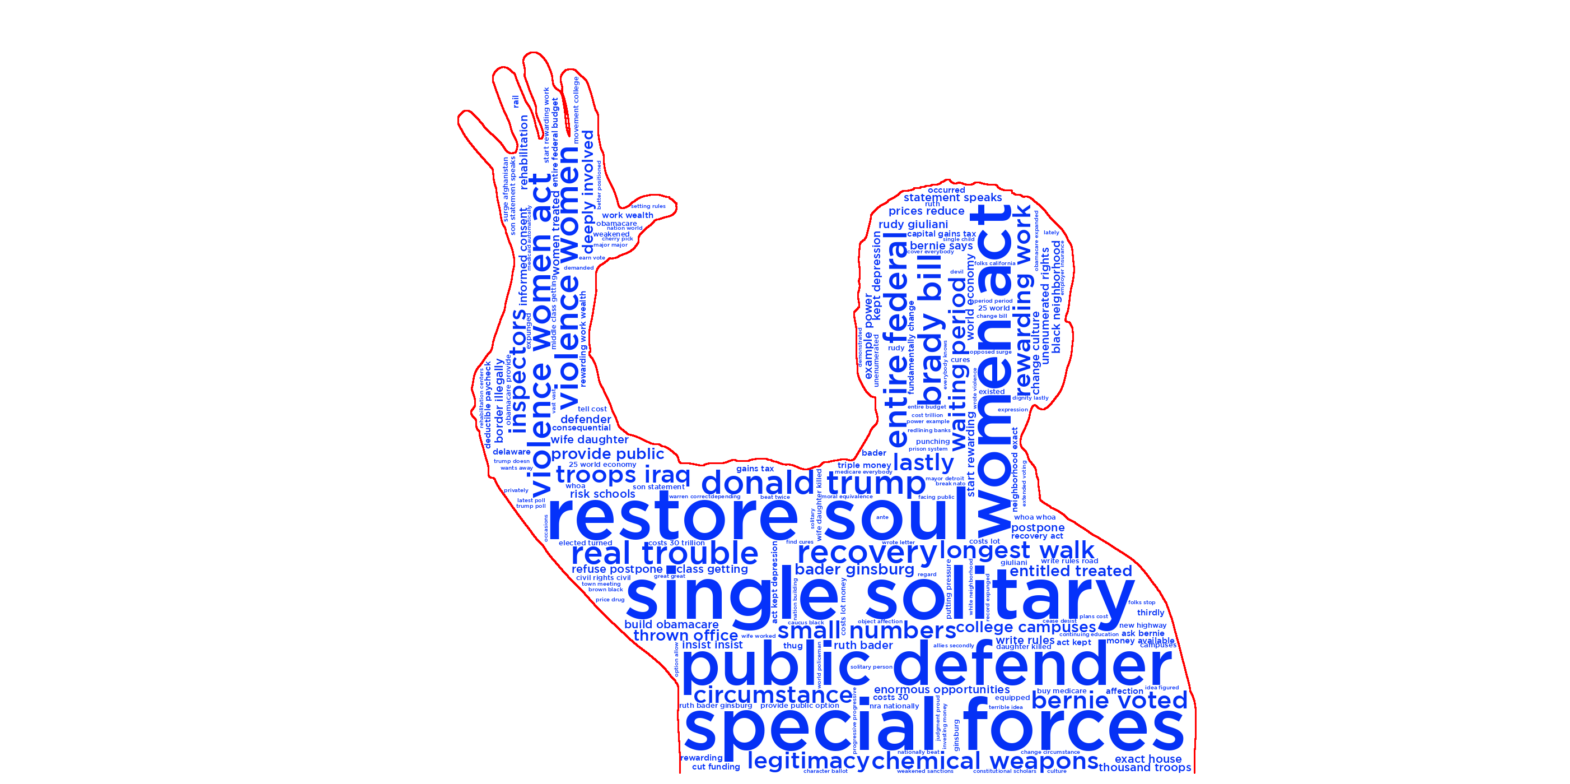

In [ ]:
#### custom color

# open the image and use np.array to transform the file to an array

cand_mask=np.array(Image.open('/content/drive/MyDrive/biden.png'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


# our function for the wordcloud to change the color. Using an hsl representation of a color
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(229,96%%, %d%%)" % np.random.randint(49,51))


#create and generate our wordcloud object
wordcloud = WordCloud(font_path = '/content/drive/MyDrive/GothamMedium.ttf',
                      background_color='white',
                      contour_color='red',
                      mask=cand_mask,
                      color_func=color_func,
                      contour_width=4).generate_from_frequencies(full_dict)

#change the color setting using the created function
wordcloud.recolor(color_func = color_func)

#plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

I've created functions below to complete all the steps we just went through to create the word cloud.

### Functions to create word frequency dictionaries and word cloud plots

In [ ]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(229,96%%, %d%%)" % np.random.randint(49,51))

def adjust_words(text1_dict, text3_dict):

    for ca_dictionary in [text1_dict,  text3_dict]:
        ca_dictionary['health care']=ca_dictionary.get('health care',0) + ca_dictionary.get('healthcare',0)

    return text1_dict,  text3_dict

def combine_dicts(text1_dict, text3_dict):
    full_dict=Counter(text1_dict)+Counter(text3_dict)
    return full_dict

def word_frequencies(candidate):


     #original text

    text = ' '.join(df[df.speaker==candidate].speech.tolist())
    text = text.lower()
    wordcloud = WordCloud(stopwords = STOP_WORDS,
                      collocations=True,
                      min_word_length =4,
                      collocation_threshold=3).generate(text)
    text1_dict={k: v for k, v in sorted(wordcloud.process_text(text).items(),reverse=True, key=lambda item: item[1])}


    #log odds ratio
    text=t_bow_df.loc[candidate].sort_values(ascending=False)[:4000]
    text3_dict={k: v for k, v in sorted(text.items(),reverse=True, key=lambda item: item[1])}


    multiplier=((Counter(text1_dict).most_common(1)[0][1])-4)/Counter(text3_dict).most_common(1)[0][1]
    text3_dict={k[0]:int(k[1]*v) for k, v in zip(text3_dict.items(),np.linspace(multiplier, 1, 4000) )}



    text1_dict, text3_dict= adjust_words(text1_dict, text3_dict)


    return text1_dict, text3_dict



def generate_wc_dict(candidate):
    text1_dict,  text3_dict = word_frequencies(candidate)
    full_dict = combine_dicts(text1_dict, text3_dict)
    full_dict={k: v for k, v in sorted(full_dict.items(),reverse=True, key=lambda item: item[1])}
    return full_dict


def plot_wc(full_dict, mask = None, color=None ):

    color_type=None
    color_mask=None
    cmap = None

    if color:
        color_type = list(color.keys())[0]

    if mask:
        mask=np.array(Image.open(mask))
        mask=np.where(mask > 3, 255, mask)



    if color == None and mask == None:

        wordcloud = WordCloud(stopwords = STOP_WORDS,
                              background_color='white',
                              max_words=500,).generate_from_frequencies(full_dict)

    else:


        if color_type == 'cmap':
            # import colormap from matplotlib as a matrix of colors
            cmap = mpl.cm.get_cmap(color[color_type])(np.linspace(0,1,20))
            cmap = mpl.colors.ListedColormap(cmap[-10:,:-1]) # select only a subset of the matrix

        elif color_type =='hsl':

            # our function for the wordcloud to change the color. Using an hsl representation of a color
            # if you would like to keep only one color, change the third value to 50 vs a random number
            def color_mask(word, font_size, position,orientation,random_state=None, **kwargs):
                return("hsl({},{}%, {}%)".format(color[color_type][0], color[color_type][1],  np.random.randint(25,70)))
        elif color_type =='colorimg':
            if mask.any():
                color_mask = ImageColorGenerator(mask)




        #create and generate our wordcloud object
        wordcloud = WordCloud(background_color='white',
                              contour_color='lightgray',
                              max_words=2000,
                              contour_width=4,
                              min_font_size=2,
                              colormap = cmap,
                              color_func=color_mask,
                              mask=mask).generate_from_frequencies(full_dict)


#     #change the color setting
#     wordcloud.recolor(color_func = color_func)

    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilInear')
    plt.axis('off')
    plt.show()

### Using the functions

I've created two functions. **generate_wc_dict**, which will take as input one of the candidate names and will output a word frequency using all of the steps above.

The second function **plot_wc(full_dict, mask, color)** <br>
Input parameters:
***full_dict:*** a dictionary with word/frequencies as key value pairs <br>
***mask:*** the path to a photo to use as a WordCloud mask, this field is optional<br>
***color:*** a dictionary describing the type of coloring for the word cloud words. <br>
The keys can take on values of *cmap*, *hsl* or *colorimg*.
- color values:
  - *cmap value* - a with a matplotlib colormap as a string *{'colormap' : 'Blues'}*
  - *hsl value* - a tuple of the first two values of a hsl color value as digits *{'hsl':(226, 96)}*
  - *colorimg value* - None / any value *{'colorimg':None}*

##### Test the functions

In [ ]:
full_dict=generate_wc_dict('harris')

<ipython-input-56-7c190be0d6b5>:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(color[color_type])(np.linspace(0,1,20))


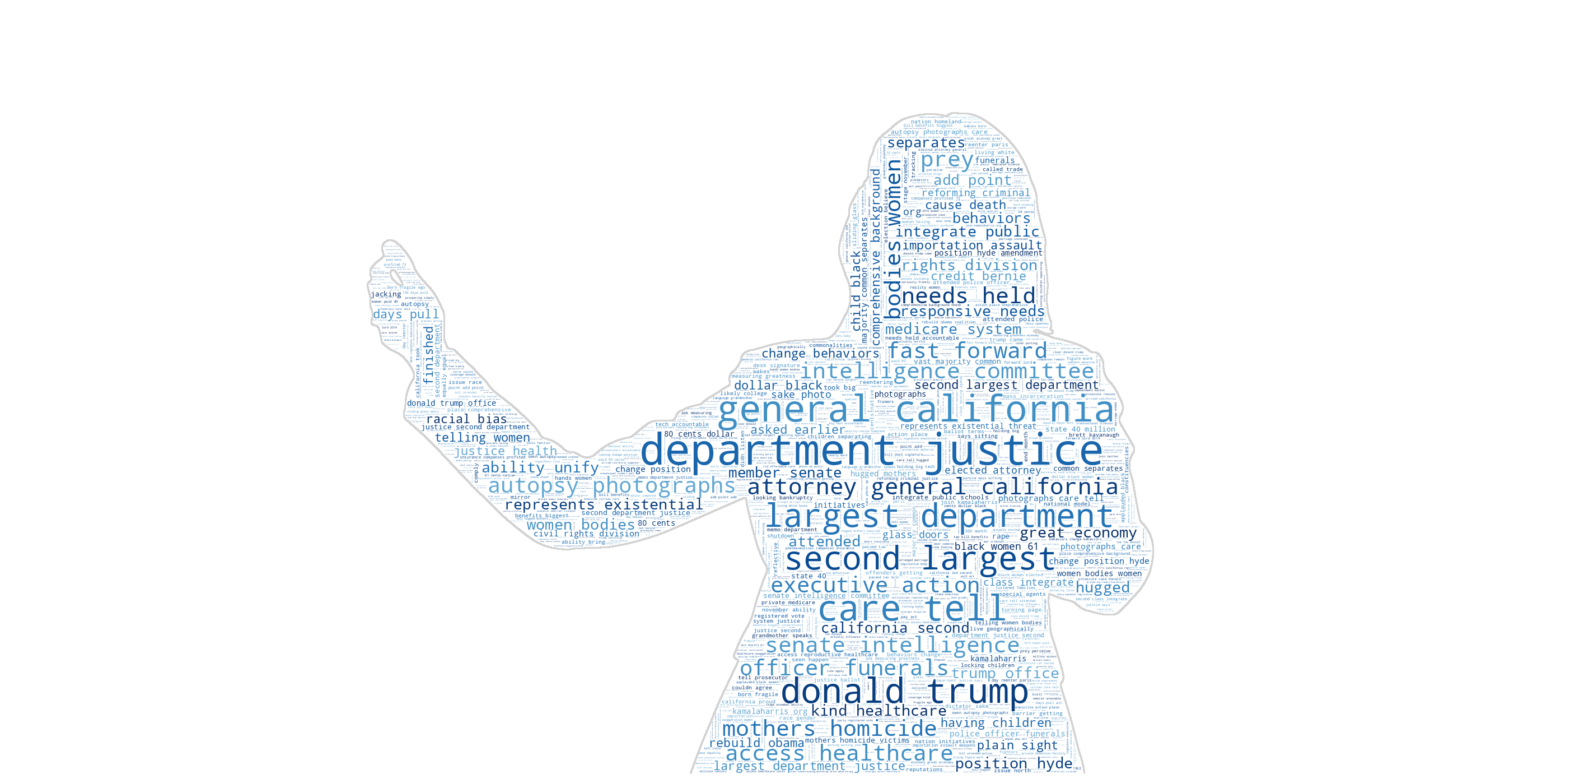

In [ ]:
plot_wc(full_dict, mask='/content/drive/MyDrive/harris.png',color={'cmap':'Blues'})

In [ ]:
wordcloud.to_file("harris_wordcloud.png")

### Create image colored word cloud

Lastly, there is an option with the word cloud to create an image colored word cloud. We will use two photos of amy klobuchar.

<img src='photos/klobuchar_full.jpg'></img>

<sup>photo by <a href="https://www.flickr.com/people/gageskidmore/">Gage Skidmore</a> CC BY-SA 2.0</sup>

<img src='photos/klobuchar.png'></img>